# Prática com a base Breast Cancer Wisconsin Dataset utilizando o Random Forest
Descrição: Dados de diagnósticos de câncer de mama, contendo características como textura, área, suavidade, etc.

Tarefa: Classificação binária para prever se o tumor é maligno (0) ou benigno (1). 

Tamanho: Médio (569 instâncias, 30 atributos).

### 01. Depências e importações

In [106]:
# depências


In [158]:
# importando bibliotecas
from sklearn.datasets import load_breast_cancer
import pandas as pd

import plotly.express as px

from sklearn.model_selection import train_test_split # função para dividir o dataset
from sklearn.ensemble import RandomForestClassifier # algoritmo de classificação

from sklearn.metrics import accuracy_score # métrica de avaliação

from sklearn.metrics import classification_report # métrica de avaliação

import matplotlib.pyplot as plt # plotar gráficos
import seaborn as sns # plotar gráficos

from sklearn.metrics import ConfusionMatrixDisplay # Plotar matriz de confusão

from sklearn.preprocessing import label_binarize # binarizar as classes
from sklearn.metrics import roc_curve, auc # métricas de avaliação de classificação binária e multiclasse 



### 02. Conexão com os dados


In [108]:
# Carregar a base de dados
data = load_breast_cancer() # dicionário Bunch

# Visualizar as chaves do dataset
print(data.keys())

print("\nClasses: malignant (maligno) (0) e benign (benigno) (1)\n")

print(data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Classes: malignant (maligno) (0) e benign (benigno) (1)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these fe

In [109]:
# Criar um DataFrame com as features
df = pd.DataFrame(data.data, columns=data.feature_names)

# Adicionar a coluna de rótulos (target) ao DataFrame
df['target'] = data.target

# Exibir as primeiras linhas do DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Tradução do df para português. 

In [ ]:
# Dicionário de tradução
# Dicionário de tradução (inglês → português)
translation_in_to_pt = {
    'mean radius': 'raio médio',
    'mean texture': 'textura média',
    'mean perimeter': 'perímetro médio',
    'mean area': 'área média',
    'mean smoothness': 'suavidade média',
    'mean compactness': 'compacidade média',
    'mean concavity': 'concavidade média',
    'mean concave points': 'pontos côncavos médios',
    'mean symmetry': 'simetria média',
    'mean fractal dimension': 'dimensão fractal média',
    'radius error': 'erro do raio',
    'texture error': 'erro da textura',
    'perimeter error': 'erro do perímetro',
    'area error': 'erro da área',
    'smoothness error': 'erro da suavidade',
    'compactness error': 'erro da compacidade',
    'concavity error': 'erro da concavidade',
    'concave points error': 'erro dos pontos côncavos',
    'symmetry error': 'erro da simetria',
    'fractal dimension error': 'erro da dimensão fractal',
    'worst radius': 'pior raio',
    'worst texture': 'pior textura',
    'worst perimeter': 'pior perímetro',
    'worst area': 'pior área',
    'worst smoothness': 'pior suavidade',
    'worst compactness': 'pior compacidade',
    'worst concavity': 'pior concavidade',
    'worst concave points': 'piores pontos côncavos',
    'worst symmetry': 'pior simetria',
    'worst fractal dimension': 'pior dimensão fractal',
    'target': 'resultado'
}

# Dicionário de tradução (português → inglês)
# Caso necessário, podemos traduzir as colunas de volta para o inglês
translation_pt_to_in = {
    'raio médio': 'mean radius',
    'textura média': 'mean texture',
    'perímetro médio': 'mean perimeter',
    'área média': 'mean area',
    'suavidade média': 'mean smoothness',
    'compacidade média': 'mean compactness',
    'concavidade média': 'mean concavity',
    'pontos côncavos médios': 'mean concave points',
    'simetria média': 'mean symmetry',
    'dimensão fractal média': 'mean fractal dimension',
    'erro do raio': 'radius error',
    'erro da textura': 'texture error',
    'erro do perímetro': 'perimeter error',
    'erro da área': 'area error',
    'erro da suavidade': 'smoothness error',
    'erro da compacidade': 'compactness error',
    'erro da concavidade': 'concavity error',
    'erro dos pontos côncavos': 'concave points error',
    'erro da simetria': 'symmetry error',
    'erro da dimensão fractal': 'fractal dimension error',
    'pior raio': 'worst radius',
    'pior textura': 'worst texture',
    'pior perímetro': 'worst perimeter',
    'pior área': 'worst area',
    'pior suavidade': 'worst smoothness',
    'pior compacidade': 'worst compactness',
    'pior concavidade': 'worst concavity',
    'piores pontos côncavos': 'worst concave points',
    'pior simetria': 'worst symmetry',
    'pior dimensão fractal': 'worst fractal dimension',
    'resultado': 'target'
}


# Tradução inglês → português
df.rename(columns=translation_in_to_pt, inplace=True)
df.head()

,raio médio,textura média,perímetro médio,área média,suavidade média,compacidade média,concavidade média,pontos côncavos médios,simetria média,dimensão fractal média,...,pior textura,pior perímetro,pior área,pior suavidade,pior compacidade,pior concavidade,piores pontos côncavos,pior simetria,pior dimensão fractal,resultado
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 03. Análise Exploratória dos Dados (EDA - Exploratory Data Analysis)

#### Análise quanto ao tipo dos dados, valores ausentes etc

In [111]:
df.head()

,raio médio,textura média,perímetro médio,área média,suavidade média,compacidade média,concavidade média,pontos côncavos médios,simetria média,dimensão fractal média,...,pior textura,pior perímetro,pior área,pior suavidade,pior compacidade,pior concavidade,piores pontos côncavos,pior simetria,pior dimensão fractal,resultado
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   raio médio                569 non-null    float64
 1   textura média             569 non-null    float64
 2   perímetro médio           569 non-null    float64
 3   área média                569 non-null    float64
 4   suavidade média           569 non-null    float64
 5   compacidade média         569 non-null    float64
 6   concavidade média         569 non-null    float64
 7   pontos côncavos médios    569 non-null    float64
 8   simetria média            569 non-null    float64
 9   dimensão fractal média    569 non-null    float64
 10  erro do raio              569 non-null    float64
 11  erro da textura           569 non-null    float64
 12  erro do perímetro         569 non-null    float64
 13  erro da área              569 non-null    float64
 14  erro da su

In [113]:
df.isnull().sum()

raio médio                  0
textura média               0
perímetro médio             0
área média                  0
suavidade média             0
compacidade média           0
concavidade média           0
pontos côncavos médios      0
simetria média              0
dimensão fractal média      0
erro do raio                0
erro da textura             0
erro do perímetro           0
erro da área                0
erro da suavidade           0
erro da compacidade         0
erro da concavidade         0
erro dos pontos côncavos    0
erro da simetria            0
erro da dimensão fractal    0
pior raio                   0
pior textura                0
pior perímetro              0
pior área                   0
pior suavidade              0
pior compacidade            0
pior concavidade            0
piores pontos côncavos      0
pior simetria               0
pior dimensão fractal       0
resultado                   0
dtype: int64

In [114]:
# Verificar valores nulos em cada coluna
null_values = df.isnull().sum()

# Verificar se há alguma coluna com valores nulos
colunas_com_nulos = null_values[null_values > 0]

if colunas_com_nulos.empty:
    print(" 🟢 Todo o dataframe não contém dados nulos.")
else:
    for column, null_count in colunas_com_nulos.items():
        percentual_nulos = (null_count / len(df)) * 100
        print(f" 🔴 Coluna '{column}' tem {null_count} valores nulos ({percentual_nulos:.2f}%).")

 🟢 Todo o dataframe não contém dados nulos.


In [115]:
df.describe()

,raio médio,textura média,perímetro médio,área média,suavidade média,compacidade média,concavidade média,pontos côncavos médios,simetria média,dimensão fractal média,...,pior textura,pior perímetro,pior área,pior suavidade,pior compacidade,pior concavidade,piores pontos côncavos,pior simetria,pior dimensão fractal,resultado
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Análise correlações 

In [116]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar a matriz de correlação usando Plotly
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')

# Configurar a altura, largura e título da matriz de correlação
fig.update_layout(
    height=700,
    width=800,
    title='Matriz de Correlação do Breast Cancer Wisconsin Dataset'
)

# Exibir a matriz de correlação
fig.show()


In [117]:
# Definir o valor limite de correlação
correlation_threshold = 0.75

# Filtrar a matriz de correlação para valores maiores/igual que o limite definido (positiva ou negativa)
high_correlation = correlation_matrix[((correlation_matrix >= correlation_threshold) | (correlation_matrix <= -correlation_threshold)) & (correlation_matrix.abs() < 1.0)]

# Criar a matriz de correlação filtrada usando Plotly
fig = px.imshow(high_correlation, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')

# Configurar a altura, largura e título da matriz de correlação
fig.update_layout(
    height=700,
    width=800,
    title='Matriz de Correlação com Valores Altos (>=|0.75|)'
)

# Exibir a matriz de correlação
fig.show()


In [119]:
# Definir correlações positivas e negativas
positive_correlations = correlation_matrix[correlation_matrix > correlation_threshold]
negative_correlations = correlation_matrix[correlation_matrix < -correlation_threshold]

# Contar o total de correlações positivas e negativas
total_positive_correlations = positive_correlations.count().sum()
total_negative_correlations = negative_correlations.count().sum()

print(f"Total de Correlações Positivas: {total_positive_correlations}")
print(f"Total de Correlações Negativas: {total_negative_correlations}\n")

# Exibir as variáveis que mais se correlacionam no formato desejado
print("Correlações Positivas:")
for column in positive_correlations.columns:
    for index in positive_correlations.index:
        if not pd.isna(positive_correlations.loc[index, column]) and index != column:
            print(f"{index} -> {column}\t ({positive_correlations.loc[index, column]:.6f})")

print("\nCorrelações Negativas:")
for column in negative_correlations.columns:
    for index in negative_correlations.index:
        if not pd.isna(negative_correlations.loc[index, column]) and index != column:
            print(f"{index} -> {column}\t ({negative_correlations.loc[index, column]:.6f})")


Total de Correlações Positivas: 137
Total de Correlações Negativas: 8

Correlações Positivas:
perímetro médio -> raio médio	 (0.997855)
área média -> raio médio	 (0.987357)
pontos côncavos médios -> raio médio	 (0.822529)
pior raio -> raio médio	 (0.969539)
pior perímetro -> raio médio	 (0.965137)
pior área -> raio médio	 (0.941082)
pior textura -> textura média	 (0.912045)
raio médio -> perímetro médio	 (0.997855)
área média -> perímetro médio	 (0.986507)
pontos côncavos médios -> perímetro médio	 (0.850977)
pior raio -> perímetro médio	 (0.969476)
pior perímetro -> perímetro médio	 (0.970387)
pior área -> perímetro médio	 (0.941550)
piores pontos côncavos -> perímetro médio	 (0.771241)
raio médio -> área média	 (0.987357)
perímetro médio -> área média	 (0.986507)
pontos côncavos médios -> área média	 (0.823269)
erro da área -> área média	 (0.800086)
pior raio -> área média	 (0.962746)
pior perímetro -> área média	 (0.959120)
pior área -> área média	 (0.959213)
pior suavidade -> suavi

#### Análises descritivas dos dados

In [127]:
fig = px.histogram(df, 
                   x='resultado', 
                   nbins=2, 
                   title='Distribuição da Coluna Target',
                   color='resultado',
                   color_discrete_map={0: 'red', 1: 'green'})

# Definir altura, largura e título do eixo y do gráfico
fig.update_layout(
    height=500,
    width=600,
    yaxis_title='Total de Amostras',
    xaxis_title='Clasisficação (0: Maligno, 1: Benigno)',
)

fig.show()

### 04. Pré-processar os dados.

In [ ]:
# 1. Tratamento de Valores Ausentes: não há valores ausentes no dataset.
# 2. Codificação de Variáveis Categóricas: não há variáveis categóricas no dataset.
# 3. Escalonamento de Variáveis Numéricas: não é necessário realizar o escalonamento das variáveis numéricas, pois vamos utilizar o modelo random fotest.
# 4. Criação de Novas Features (Feature Engineering): 
# 5. Remoção de Colunas Desnecessárias: não há colunas desnecessárias no dataset.

#### Engenharia de Features


Vamos  gerar aqui algumas novas features para contribuirem para o modelo: 
- Razões entre variáveis:
    + mean radius / mean area: Razão entre o raio médio e a área média.
    + mean perimeter / mean radius: Razão entre o perímetro médio e o raio médio.
    + mean compactness / mean smoothness: Razão entre a compactação média e a suavidade
- Medidas estatísticas:
    + std_radius: Desvio padrão do raio
    + std_texture: Desvio padrão da textura
    
- Interações entre variáveis:
    + mean smoothness * mean fractal dimension: Produto entre suavidade média e a dimensão fractal média. Isso pode ser uma característica importante, pois esses dois aspectos podem influenciar a complexidade e a borda do tumor.
    + mean area - mean perimeter: A diferença entre a área média e o perímetro médio pode fornecer informações adicionais sobre a forma do tumor.
- Aspectos geométricos:
    + mean area / (mean radius^2): Essa fórmula pode aproximar a forma do tumor. A relação entre a área e o quadrado do raio pode indicar se o tumor está mais "esférico" ou "elongado".
- Transformações de erros:
    + mean radius error / mean radius: A relação entre o erro do raio e o raio médio pode ser uma medida útil da precisão das medições
- Transformações de potência:
    + log(mean area): O logaritmo da área pode ajudar a lidar com valores muito grandes e pode melhorar a distribuição dos dados.


### 5. Dividir o dataset em treino e teste.

In [132]:
# Dividir o dataset em treino e teste

# Definir as features (X) e o target (y)
X = df.drop('resultado', axis=1)
y = df['resultado']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, # features, características
    y, # alvo (target/rótulo)
    test_size=0.2, # 20% dos dados para teste
    random_state=42, # fixar a semente para reprodução dos resultados
    shuffle=True, # embaralhar os dados (false se aplica em séries temporais por exemplo)
    stratify=y # preservar a proporção dos rótulos
)

# Exibir a forma dos datasets de treino e teste
print(f"Total de exemplos: {len(df)}")
print(f"Exemplos para treinamentos: {X_train.shape} ({(len(X_train) / len(df)) * 100:.2f}%)")
print(f"Exemplos para testes: {X_test.shape} ({(len(X_test) / len(df)) * 100:.2f}%)")



Total de exemplos: 569
Exemplos para treinamentos: (455, 30) (79.96%)
Exemplos para testes: (114, 30) (20.04%)


In [133]:
X_train.head()

,raio médio,textura média,perímetro médio,área média,suavidade média,compacidade média,concavidade média,pontos côncavos médios,simetria média,dimensão fractal média,...,pior raio,pior textura,pior perímetro,pior área,pior suavidade,pior compacidade,pior concavidade,piores pontos côncavos,pior simetria,pior dimensão fractal
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


In [134]:
y_train.head()

546    1
432    0
174    1
221    1
289    1
Name: resultado, dtype: int32

In [135]:
X_test.head()

,raio médio,textura média,perímetro médio,área média,suavidade média,compacidade média,concavidade média,pontos côncavos médios,simetria média,dimensão fractal média,...,pior raio,pior textura,pior perímetro,pior área,pior suavidade,pior compacidade,pior concavidade,piores pontos côncavos,pior simetria,pior dimensão fractal
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.4251,0.19410,0.2818,0.10050
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.1663,0.09123,0.2394,0.06469
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115


In [136]:
y_test.head()

256    0
428    1
501    0
363    1
564    0
Name: resultado, dtype: int32

### 7. Treinamento o modelo com hiperparâmetros padrões

In [140]:
# Configuração com todos os hiperparâmetros
model = RandomForestClassifier(
    n_estimators=100,             # Número de árvores
    criterion="gini",             # Métrica para divisão ("gini" ou "entropy")
    max_depth=None,               # Profundidade máxima das árvores
    min_samples_split=2,          # Mínimo de amostras para dividir um nó
    min_samples_leaf=1,           # Mínimo de amostras em uma folha
    min_weight_fraction_leaf=0.0, # Fração mínima de peso nas folhas
    max_features="sqrt",          # Número máximo de features para divisão
    max_leaf_nodes=None,          # Número máximo de folhas
    bootstrap=True,               # Se as amostras são retiradas com reposição
    oob_score=False,              # Usar validação out-of-bag
    n_jobs=None,                  # Número de CPUs para execução (-1 para todas)
    random_state=42,              # Semente para reprodutibilidade (42 para facilitar a correção, mantendo fixa a semente)
    verbose=0,                    # Controle do output do treinamento
    warm_start=False,             # Reutilizar árvores anteriores
    class_weight=None             # Peso das classes (para dados desbalanceados)
)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 8. Avaliar o modelo.

In [149]:
# Realizar previsões
y_pred = model.predict(X_test)

### 9. Ajustar hiperparâmetros.

### 10. Validar cruzadamente.

### 11. Realizar o treinamento após definição dos melhores hiperparâmetros. 

### 12. Interpretar e visualizar os resultados.

#### Acurácia 

In [144]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)

total_test_data = len(y_test)
correctly_classified = sum(y_test == y_pred)

print(f"Total de dados utilizados para testes: {total_test_data}")
print(f"Total de dados classificados corretamente: {correctly_classified}")
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Total de dados utilizados para testes: 114
Total de dados classificados corretamente: 109
Acurácia do modelo: 95.61%


#### Relatório de classificação

In [146]:
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\danil\AppData\Local\Temp\ipykernel_31832\3338163629.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\danil\AppData\Local\Temp\ipykernel_31832\3338163629.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\danil\AppData\Local\Temp\ipykernel_31832\3338163629.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




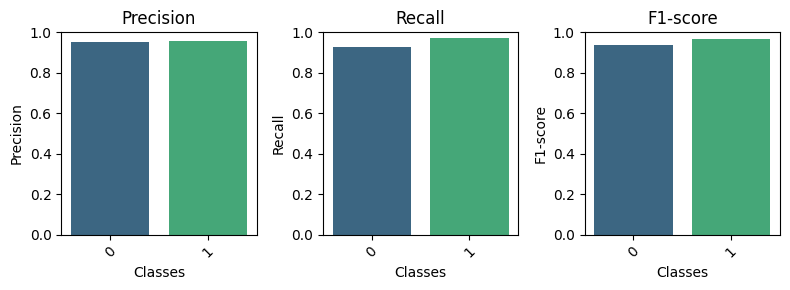

In [ ]:


# Geração do relatório como dicionário
report = classification_report(y_test, y_pred, output_dict=True)

# Transformar em DataFrame para visualização
report_df = pd.DataFrame(report).transpose()

# Filtrar apenas as classes (ignorando 'accuracy', 'macro avg', etc.)
classes = report_df.index[:-3]  # Ignorar últimas linhas gerais (accuracy, macro avg)

# Gráficos de barras para Precision, Recall e F1-Score
plt.figure(figsize=(8, 3))
metrics = ['precision', 'recall', 'f1-score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=report_df.loc[classes].index, y=report_df.loc[classes][metric], palette="viridis")
    plt.title(metric.capitalize())
    plt.xlabel("Classes")
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1)  # Escala de 0 a 1
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

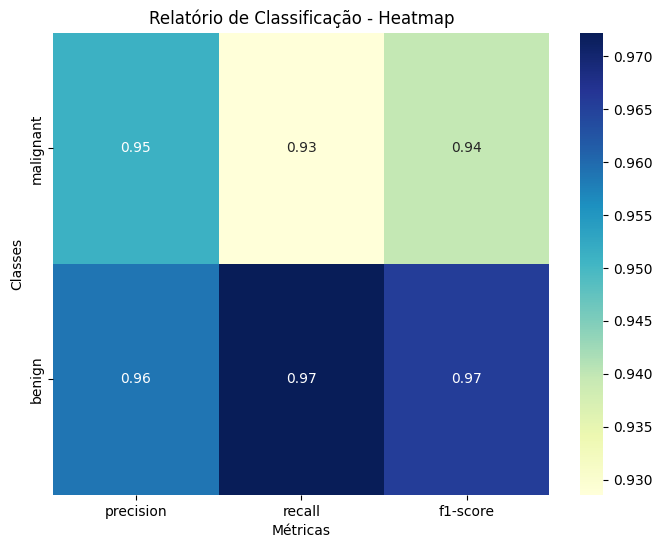

In [150]:
# Gráfico Heatmap
plt.figure(figsize=(8, 6))
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=data.target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Definir as classes e métricas para o heatmap
classes = data.target_names
metrics = ['precision', 'recall', 'f1-score']

# Plotar o heatmap
sns.heatmap(report_df.loc[classes][metrics], annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Relatório de Classificação - Heatmap")
plt.ylabel("Classes")
plt.xlabel("Métricas")
plt.show()


#### Matriz de confusão


Matriz de Confusão:
Mostra as previsões corretas e incorretas para cada classe.


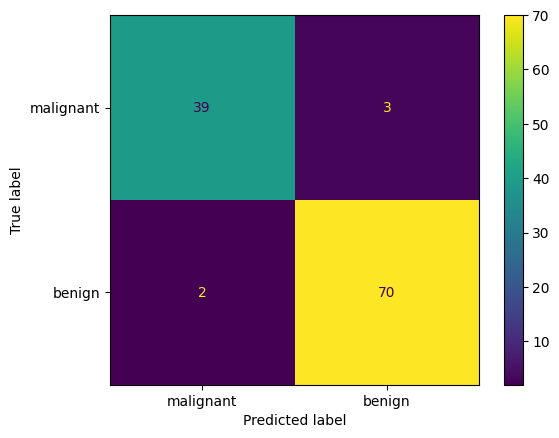

In [154]:
print("\nMatriz de Confusão:")
print("Mostra as previsões corretas e incorretas para cada classe.")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=data.target_names)

#### Importância das características

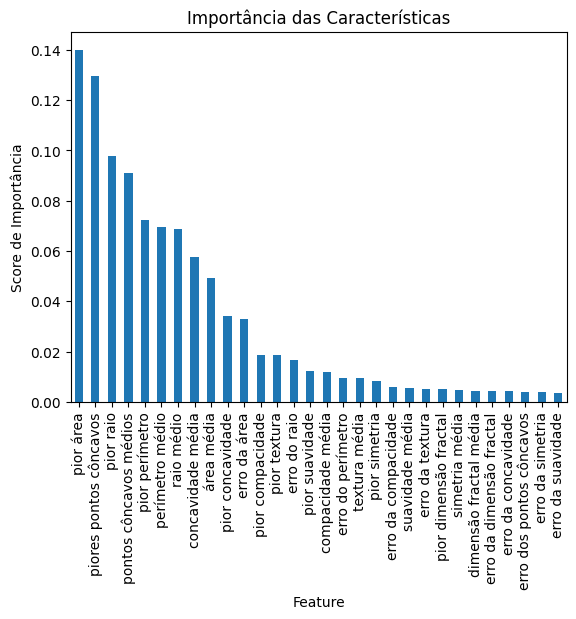

In [167]:

# Importância das características
feature_importances = model.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualização
importances_df.plot.bar(x='Feature', y='Importance', legend=False, title="Importância das Características")
plt.ylabel("Score de Importância")
plt.show()


#### Distribuição de Erros



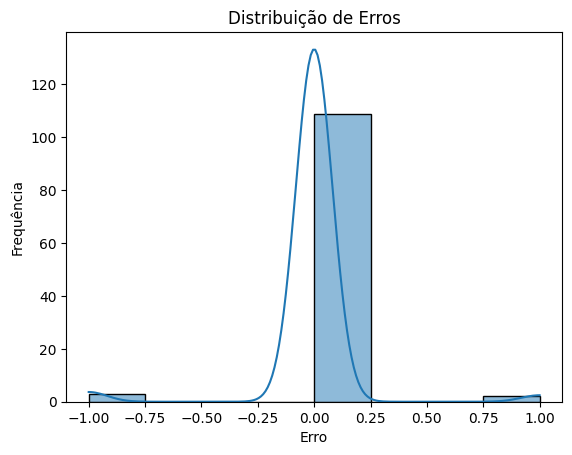

In [168]:
# Diferença entre previsões e valores reais
errors = y_test - y_pred

# Plotar distribuição de erros
sns.histplot(errors, kde=True)
plt.title("Distribuição de Erros")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.show()


### 

### 13. Salvar e implementar o modelo.

In [174]:
import joblib

# Salvar o modelo treinado
joblib.dump(model, '01 - random forest - Breast Cancer Wisconsin Dataset.pkl')

['01 - random forest - Breast Cancer Wisconsin Dataset.pkl']

#### Carregando um modelo já salvo anteriormente

In [175]:
import joblib

# Carregar o modelo salvo
modelo_carregado = joblib.load('01 - random forest - Breast Cancer Wisconsin Dataset.pkl')

# Verificar se o modelo foi carregado corretamente
print(modelo_carregado)

RandomForestClassifier(random_state=42)


In [179]:
# Exibir os hiperparâmetros do modelo carregado
print("Hiperparâmetros do modelo carregado:")
params = modelo_carregado.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

Hiperparâmetros do modelo carregado:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


###

###